In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def asignar_instantes(data: pd.DataFrame) -> list[float]:
    data["Instante"] = data["t"].rank(method='dense').astype(int)
    return data

### PRIMER CONJUNTO

In [8]:
folder_resultado = "set1173"
# folder_resultado = "sin_fronteras193"
path_folder = f"..\\..\\data\\{folder_resultado}\\"
directorios = {var: path_folder + var + ".dat" for var in ["densidad", "velocidad", "presion"]}

data_variable = {}
data_variable["densidad"] = pd.read_csv(directorios.get("densidad"), delimiter="\t", names=["t", "x", "rho"])
data_variable["velocidad"] = pd.read_csv(directorios.get("velocidad"), delimiter="\t", names=["t", "x", "u"])
data_variable["presion"] = pd.read_csv(directorios.get("presion"), delimiter="\t", names=["t", "x", "p"])

data_variable = {x: asignar_instantes(data_variable[x]) for x in data_variable.keys()}
datos = data_variable["densidad"].join(data_variable["velocidad"]["u"]).join(data_variable["presion"]["p"])

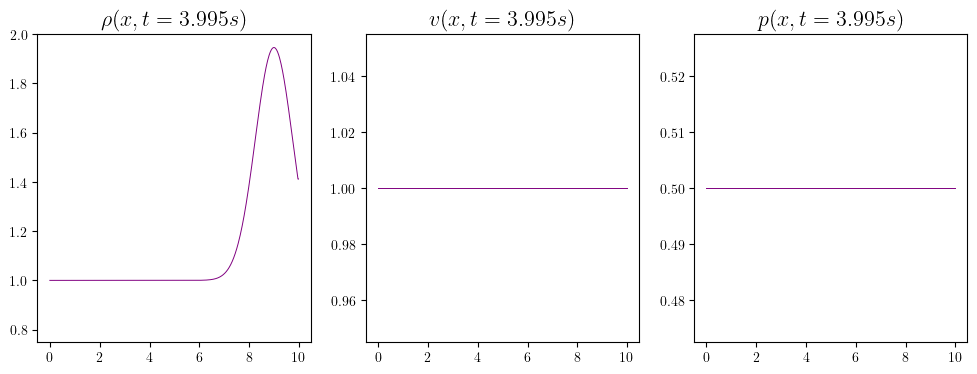

In [9]:
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
instantes_a_graficar = [1, 135, 269, 401]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
for instante in instantes_a_graficar:

    time_stamp = instante
    frame_datos = datos.query("Instante == @time_stamp")
    time_secs = frame_datos["t"].values[0]
    ax1.clear()
    # Configuraciones plots
    tamaño_titulo = 16
    margen = 0.25
    min_rho = datos['rho'].min()
    max_rho = datos['rho'].max()
    min_rho = min_rho - (max_rho-min_rho)*margen
    ax1.set_ylim(min_rho, max_rho)

    ax1.plot(frame_datos["x"], frame_datos["rho"], color="purple", linewidth = 0.7)
    ax1.set_title(r"$\rho(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax2.clear()
    ax2.plot(frame_datos["x"], frame_datos["u"], color="purple", linewidth = 0.7)
    ax2.set_title(r"$v(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax3.clear()
    ax3.plot(frame_datos["x"], frame_datos["p"], color="purple", linewidth = 0.7)
    ax3.set_title(r"$p(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    plt.savefig(f'set1/{time_stamp}.pdf',bbox_inches='tight', pad_inches=0.1, format='pdf')

### SEGUNDO CONJUNTO

In [4]:
folder_resultado = ""
folder_resultado = "sod_con_entropy148"
path_folder = f"..\\data\\{folder_resultado}\\"
directorios = {var: path_folder + var + ".dat" for var in ["densidad", "velocidad", "presion"]}

data_variable = {}
data_variable["densidad"] = pd.read_csv(directorios.get("densidad"), delimiter="\t", names=["t", "x", "rho"])
data_variable["velocidad"] = pd.read_csv(directorios.get("velocidad"), delimiter="\t", names=["t", "x", "u"])
data_variable["presion"] = pd.read_csv(directorios.get("presion"), delimiter="\t", names=["t", "x", "p"])

data_variable = {x: asignar_instantes(data_variable[x]) for x in data_variable.keys()}
datos = data_variable["densidad"].join(data_variable["velocidad"]["u"]).join(data_variable["presion"]["p"])

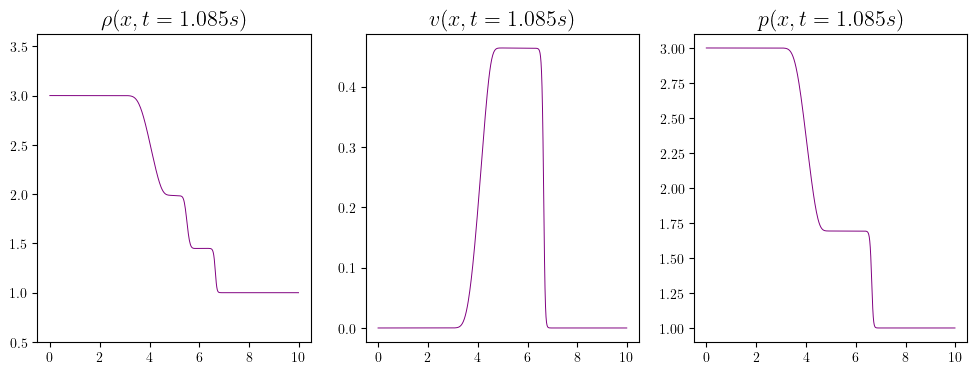

In [19]:
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
instantes_a_graficar = [1, 20, 60, 110]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
for instante in instantes_a_graficar:

    time_stamp = instante
    frame_datos = datos.query("Instante == @time_stamp")
    time_secs = frame_datos["t"].values[0]
    ax1.clear()
    # Configuraciones plots
    tamaño_titulo = 16
    margen = 0.25
    min_rho = datos['rho'].min()
    max_rho = datos['rho'].max()
    min_rho = min_rho - (max_rho-min_rho)*margen
    max_rho = max_rho + (max_rho-min_rho)*margen
    ax1.set_ylim(min_rho, max_rho)

    min_u = datos['u'].min()
    max_u = datos['u'].max()
    min_u = min_u - (max_u-min_u)*margen
    max_u = max_u + (max_u-min_u)*margen
    ax2.set_ylim(min_u, max_u)

    min_p = datos['p'].min()
    max_p = datos['p'].max()
    min_p = min_p - (max_p-min_p)*margen
    max_p = max_p + (max_p-min_p)*margen
    ax2.set_ylim(min_p, max_p)

    ax1.plot(frame_datos["x"], frame_datos["rho"], color="purple", linewidth = 0.7)
    ax1.set_title(r"$\rho(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax2.clear()
    ax2.plot(frame_datos["x"], frame_datos["u"], color="purple", linewidth = 0.7)
    ax2.set_title(r"$v(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    ax3.clear()
    ax3.plot(frame_datos["x"], frame_datos["p"], color="purple", linewidth = 0.7)
    ax3.set_title(r"$p(x, t =" + str(time_secs) + r"s)$", fontsize=tamaño_titulo)
    plt.savefig(f'set2/{time_stamp}.pdf',bbox_inches='tight', pad_inches=0.1, format='pdf')

In [20]:
min_p

0.5